In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [312]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [313]:
from sklearn.metrics import accuracy_score, classification_report

In [314]:
df= pd.read_csv('survey.csv')

In [315]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [316]:
df.shape

(1259, 27)

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [318]:
df.drop(['Country','state','Timestamp','comments'],axis=1,inplace = True)

In [319]:
df.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [320]:
df['self_employed'].fillna('No', inplace= True)

In [321]:
df['work_interfere'].fillna('N/A', inplace= True)

In [322]:
df.drop(df[(df['Age']>60) | (df['Age']<18)] .index, inplace = True)

In [323]:
'''
0 Male
1 Female
2 Trans
'''

df['Gender'].replace([ 'Male', 'male', 'M', 'm', 'Male', 'Cis Male', 
                        'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)', 
                        'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make', 'ostensibly male, unsure what that really means ',], 0, inplace=True)

df['Gender'].replace([ 'Female', 'female', 'F', 'f', 'Woman', 
                        'Female', 'femail', 'Cis Female', 'cis-female/femme', 
                        'Femake', 'Female (cis)', 'woman','Male','Female' ], 1, inplace=True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                        'fluid', 'queer', 'Androgyne', 'Trans-female', 
                        'male learning androgynous', 'Agender', 
                        'A little about you', 'Nah', 'All', 'ostensibly male', 
                        'unsure what that really means','Genderqueer', 'Enby', 'p', 
                        'Neuter', 'something kinda male?', 'Guy (-ish) ^_^', 'Trans woman', ], 
                       2, inplace=True)

In [324]:
df["Gender"].replace(['Male ','Female ','male leaning androgynous','ostensibly male, unsure what that really means'], 
                       2, inplace=True)

In [325]:
df['Gender'].value_counts()

Gender
0    980
1    244
2     23
Name: count, dtype: int64

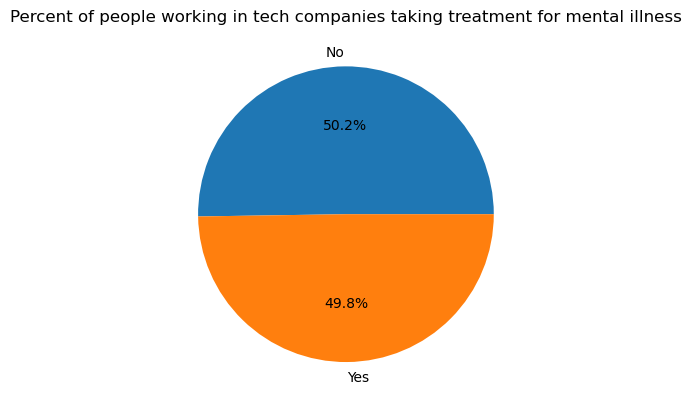

In [326]:
# Filter dataframe for only those rows where 'tech_company' is True
df_tech = df[df['tech_company'] == 'Yes']

# Generate pie chart for 'treatment' column
df_tech['treatment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percent of people working in tech companies taking treatment for mental illness')
plt.ylabel('')  # This line hides the 'treatment' ylabel.
plt.show()

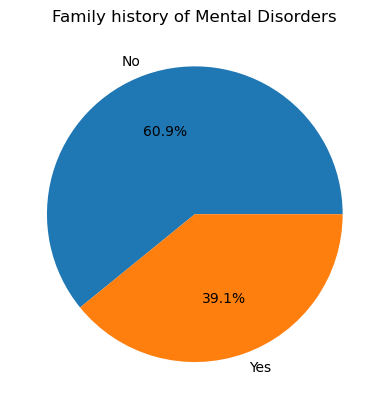

In [327]:
df['family_history'].value_counts().plot.pie(autopct='%1.1f%%')

plt.title('Family history of Mental Disorders')
plt.ylabel('')  # This line hides the 'column' ylabel.
plt.show()

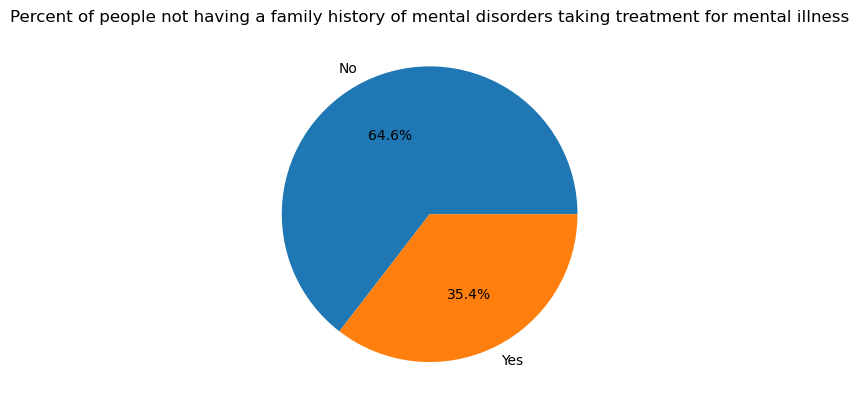

In [328]:
# Filter dataframe for only those rows where 'Family_History' is True
df_tech = df[df['family_history'] == 'No']

# Generate pie chart for 'treatment' column
df_tech['treatment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percent of people not having a family history of mental disorders taking treatment for mental illness')
plt.ylabel('')  # This line hides the 'treatment' ylabel.
plt.show()

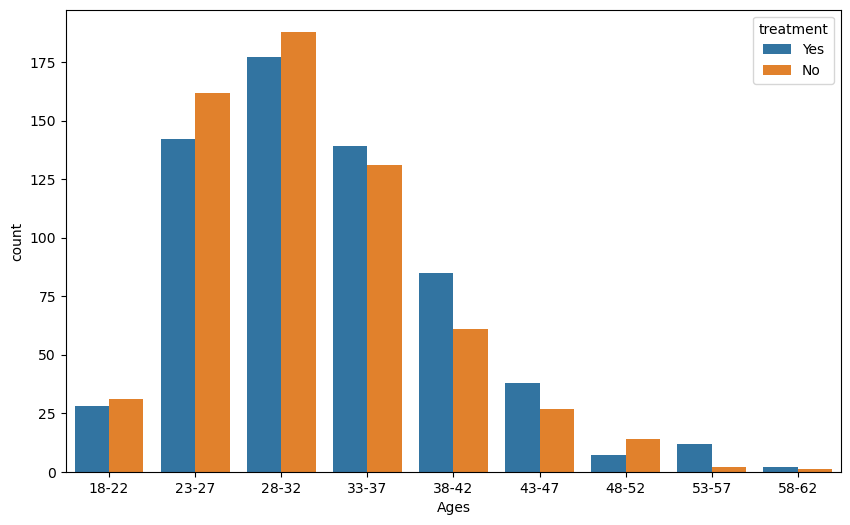

In [329]:
df1=df.copy()
# Define the age ranges and their labels
bins = range(18, df['Age'].max() + 5, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]
df1['Ages'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
# Plot the countplot with hue
plt.figure(figsize=(10, 6))
sns.countplot(x='Ages', data=df1, hue=df1['treatment'])
plt.show()

<Axes: xlabel='treatment', ylabel='count'>

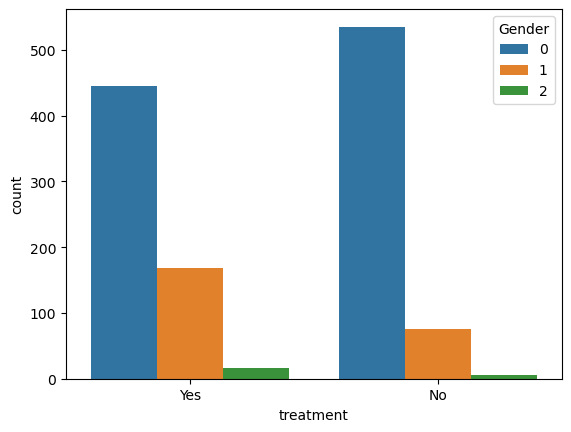

In [330]:
df1=df.copy()
sns.countplot(x='treatment', data=df1, hue=df1['Gender'])

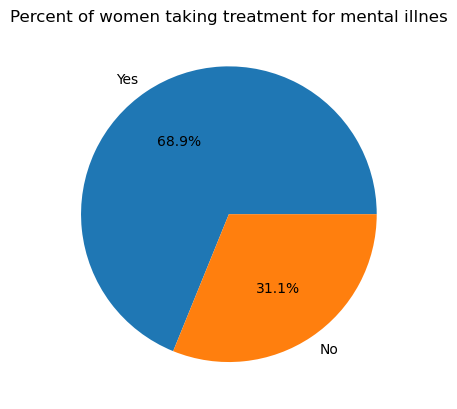

In [331]:
# Filter dataframe for only those rows where 'tech_company' is True
df_tech = df[df['Gender'] == 1]

# Generate pie chart for 'treatment' column
df_tech['treatment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percent of women taking treatment for mental illnes')
plt.ylabel('')  # This line hides the 'treatment' ylabel.
plt.show()

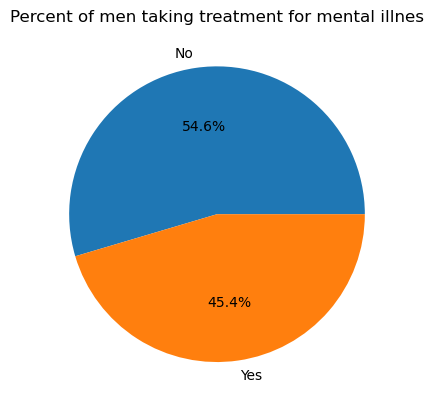

In [332]:
# Filter dataframe for only those rows where 'tech_company' is True
df_tech = df[df['Gender'] == 0]

# Generate pie chart for 'treatment' column
df_tech['treatment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percent of men taking treatment for mental illnes')
plt.ylabel('')  # This line hides the 'treatment' ylabel.
plt.show()

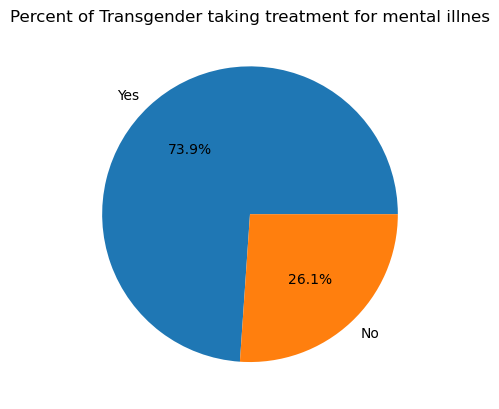

In [333]:
# Filter dataframe for only those rows where 'tech_company' is True
df_tech = df[df['Gender'] == 2]

# Generate pie chart for 'treatment' column
df_tech['treatment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percent of Transgender taking treatment for mental illnes')
plt.ylabel('')  # This line hides the 'treatment' ylabel.
plt.show()

In [334]:
df['self_employed'].value_counts()

self_employed
No     1107
Yes     140
Name: count, dtype: int64

In [335]:
'''
0 No
1 Yes
'''
df["self_employed"].replace(['No'], 0, inplace=True)
df["self_employed"].replace(['Yes'], 1, inplace=True)

In [336]:
df['family_history'].value_counts()

family_history
No     759
Yes    488
Name: count, dtype: int64

In [337]:
'''
0 No
1 Yes
'''
df["family_history"].replace(['No'], 0, inplace=True)
df["family_history"].replace(['Yes'], 1, inplace=True)

In [338]:
df['treatment'].value_counts()

treatment
Yes    630
No     617
Name: count, dtype: int64

In [339]:
'''
0 No
1 Yes
'''
df["treatment"].replace(['No'], 0, inplace=True)
df["treatment"].replace(['Yes'], 1, inplace=True)

In [340]:
df['work_interfere'].value_counts()

work_interfere
Sometimes    463
N/A          261
Never        210
Rarely       173
Often        140
Name: count, dtype: int64

In [341]:
'''
Sometimes    1
N/A          0
Never        2
Rarely       3
Often        4
'''
df["work_interfere"].replace(['N/A'], 0, inplace=True)
df["work_interfere"].replace(['Sometimes'], 1, inplace=True)
df["work_interfere"].replace(['Never'], 2, inplace=True)
df["work_interfere"].replace(['Rarely'], 3, inplace=True)
df["work_interfere"].replace(['Often'], 4, inplace=True)

In [342]:
'''
6-25              1
26-100            2
More than 1000    5
100-500           3
1-5               0
500-1000          4
'''
df["no_employees"].replace(['1-5',], 0, inplace=True)
df["no_employees"].replace(['6-25'], 1, inplace=True)
df["no_employees"].replace(['26-100'], 2, inplace=True)
df["no_employees"].replace(['100-500'], 3, inplace=True)
df["no_employees"].replace(['500-1000'], 4, inplace=True)
df["no_employees"].replace(['More than 1000'], 5, inplace=True)

In [343]:
df['no_employees'].value_counts()

no_employees
1    288
2    288
5    280
3    175
0    157
4     59
Name: count, dtype: int64

In [344]:
'''
0 No
1 Yes
'''
df["tech_company"].replace(['No'], 0, inplace=True)
df["tech_company"].replace(['Yes'], 1, inplace=True)

In [345]:
df['tech_company'].value_counts()

tech_company
1    1023
0     224
Name: count, dtype: int64

In [346]:
'''
0 No
1 Yes
'''
df["remote_work"].replace(['No'], 0, inplace=True)
df["remote_work"].replace(['Yes'], 1, inplace=True)

In [347]:
df['remote_work'].value_counts()

remote_work
0    879
1    368
Name: count, dtype: int64

In [348]:
'''
0 No
1 Yes
2 Don't know
'''
df["benefits"].replace(['No'], 0, inplace=True)
df["benefits"].replace(['Yes'], 1, inplace=True)
df["benefits"].replace(['Don\'t know'], 2, inplace=True)

In [349]:
df['benefits'].value_counts()

benefits
1    471
2    407
0    369
Name: count, dtype: int64

In [350]:
'''
0 No
1 Yes
2 Not sure
'''
df["care_options"].replace(['No'], 0, inplace=True)
df["care_options"].replace(['Yes'], 1, inplace=True)
df["care_options"].replace(['Not sure'], 2, inplace=True)              

In [351]:
df['care_options'].value_counts()

care_options
0    497
1    438
2    312
Name: count, dtype: int64

In [352]:
'''
0 No
1 Yes
2 Don't know
'''
df["wellness_program"].replace(['No'], 0, inplace=True)
df["wellness_program"].replace(['Yes'], 1, inplace=True)
df["wellness_program"].replace(['Don\'t know'], 2, inplace=True)

In [353]:
df['wellness_program'].value_counts()

wellness_program
0    835
1    227
2    185
Name: count, dtype: int64

In [354]:
'''
0 No
1 Yes
2 Don't know
'''
df["seek_help"].replace(['No'], 0, inplace=True)
df["seek_help"].replace(['Yes'], 1, inplace=True)
df["seek_help"].replace(['Don\'t know'], 2, inplace=True)

In [355]:
df['seek_help'].value_counts()

seek_help
0    639
2    363
1    245
Name: count, dtype: int64

In [356]:
'''
0 No
1 Yes
2 Don't know
'''
df["anonymity"].replace(['No'], 0, inplace=True)
df["anonymity"].replace(['Yes'], 1, inplace=True)
df["anonymity"].replace(['Don\'t know'], 2, inplace=True)                    

In [357]:
df['anonymity'].value_counts()

anonymity
2    811
1    372
0     64
Name: count, dtype: int64

In [358]:
'''
Don't know            0
Somewhat easy         1
Very easy             2
Somewhat difficult    3
Very difficult        4
'''
df["leave"].replace(['Don\'t know',], 0, inplace=True)
df["leave"].replace(['Somewhat easy'], 1, inplace=True)
df["leave"].replace(['Very easy'], 2, inplace=True)
df["leave"].replace(['Somewhat difficult'], 3, inplace=True)
df["leave"].replace(['Very difficult'], 4, inplace=True)

In [359]:
df['leave'].value_counts()

leave
0    560
1    264
2    202
3    125
4     96
Name: count, dtype: int64

In [360]:
'''
0 No
1 Yes
2 Maybe
'''
df["mental_health_consequence"].replace(['No'], 0, inplace=True)
df["mental_health_consequence"].replace(['Yes'], 1, inplace=True)
df["mental_health_consequence"].replace(['Maybe'], 2, inplace=True)   

In [361]:
df['mental_health_consequence'].value_counts()

mental_health_consequence
0    487
2    473
1    287
Name: count, dtype: int64

In [362]:
'''
0 No
1 Yes
2 Maybe
'''
df["phys_health_consequence"].replace(['No'], 0, inplace=True)
df["phys_health_consequence"].replace(['Yes'], 1, inplace=True)
df["phys_health_consequence"].replace(['Maybe'], 2, inplace=True)   

In [363]:
df['phys_health_consequence'].value_counts()

phys_health_consequence
0    918
2    271
1     58
Name: count, dtype: int64

In [364]:
'''
0 No
1 Yes
2 Some of them
'''
df["coworkers"].replace(['No'], 0, inplace=True)
df["coworkers"].replace(['Yes'], 1, inplace=True)
df["coworkers"].replace(['Some of them'], 2, inplace=True)                       

In [365]:
df['coworkers'].value_counts()

coworkers
2    767
0    258
1    222
Name: count, dtype: int64

In [366]:
'''
0 No
1 Yes
2 Some of them
'''
df["supervisor"].replace(['No'], 0, inplace=True)
df["supervisor"].replace(['Yes'], 1, inplace=True)
df["supervisor"].replace(['Some of them'], 2, inplace=True)                     

In [367]:
df['supervisor'].value_counts()

supervisor
1    509
0    389
2    349
Name: count, dtype: int64

In [368]:
'''
0 No
1 Yes
2 Maybe
'''
df["mental_health_interview"].replace(['No'], 0, inplace=True)
df["mental_health_interview"].replace(['Yes'], 1, inplace=True)
df["mental_health_interview"].replace(['Maybe'], 2, inplace=True)    

In [369]:
df['mental_health_interview'].value_counts()

mental_health_interview
0    1000
2     206
1      41
Name: count, dtype: int64

In [370]:
'''
0 No
1 Yes
2 Maybe
'''
df["phys_health_interview"].replace(['No'], 0, inplace=True)
df["phys_health_interview"].replace(['Yes'], 1, inplace=True)
df["phys_health_interview"].replace(['Maybe'], 2, inplace=True)    

In [371]:
df['phys_health_interview'].value_counts()

phys_health_interview
2    553
0    494
1    200
Name: count, dtype: int64

In [372]:
'''
0 No
1 Yes
2 Don't know
'''
df["mental_vs_physical"].replace(['No'], 0, inplace=True)
df["mental_vs_physical"].replace(['Yes'], 1, inplace=True)
df["mental_vs_physical"].replace(['Don\'t know'], 2, inplace=True)                    

In [373]:
df['mental_vs_physical'].value_counts()

mental_vs_physical
2    573
1    337
0    337
Name: count, dtype: int64

In [374]:
'''
0 No
1 Yes
'''
df["obs_consequence"].replace(['No'], 0, inplace=True)
df["obs_consequence"].replace(['Yes'], 1, inplace=True)               

In [375]:
df['obs_consequence'].value_counts()

obs_consequence
0    1068
1     179
Name: count, dtype: int64

82 % of people who gave this survey work in tech companie

In [376]:
X=df.drop('treatment',axis=1)
y=df['treatment']

In [377]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [378]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [379]:
#logestic regression
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression()

# Train the model on the training data
modelLR.fit(X_train, y_train)

# Make predictions on the test data
y_pred = modelLR.predict(X_test)

# Evaluate the model
accuracyLR = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracyLR:.2f}")

Accuracy: 0.75


In [380]:
#decsion tree
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracyDT = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracyDT:.2f}")

Accuracy: 0.51


c:\Users\vinit\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [381]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

# Choose a machine learning model (e.g., Random Forest)
modelRFC = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the model
modelRFC.fit(X_train, y_train)

# Make predictions on the test data
y_pred = modelRFC.predict(X_test)

# Evaluate the model's performance
accuracyRF = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracyRF:.2f}')

Accuracy: 0.83


In [382]:
# XGBoost

import xgboost as xgb


dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set hyperparameters for the XGBoost model
param = {
    'max_depth': 3,           # Maximum depth of each tree
    'eta': 0.3,               # Learning rate
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss'  # Evaluation metric
}

# Train the XGBoost model
num_round = 100
modelXGB = xgb.train(param, dtrain, num_round)

# Make predictions
y_pred = modelXGB.predict(dtest)

# Convert predicted probabilities to binary labels
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

# Calculate accuracy and display classification report
accuracyXGB = accuracy_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracyXGB:.2f}")

Accuracy: 0.82


In [383]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with k=3
k = 11
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracyKNN = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracyKNN * 100:.2f}%")

Accuracy: 69.60%


In [384]:
#Ada Booster Clasifier
modelA = AdaBoostClassifier(random_state=101)

modelA.fit(X_train, y_train)

y_pred = modelA.predict(X_test)

accuracyABC = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracyABC:.2f}')

Accuracy: 0.85


In [385]:
params_test = {'n_estimators': [int(x) for x in np.linspace (start = 1, stop = 50, num = 15)], 
              'learning_rate': [(0.97 + x/100) for x in range(0, 8)], } 

params_test

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [386]:
from sklearn.model_selection import RandomizedSearchCV
test_random = RandomizedSearchCV(random_state=49, estimator=modelA, param_distributions = params_test,n_iter =50, cv=5,n_jobs=-1)
test_random.fit(X_train,y_train)

test_random.best_params_

{'n_estimators': 36, 'learning_rate': 0.98}

In [387]:
modelAA_tuned = AdaBoostClassifier(n_estimators=36, random_state=49, learning_rate=0.98)
modelAA_tuned.fit(X_train,y_train)

y_pred = modelAA_tuned.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_tuned:.2f}')

Accuracy: 0.86


In [388]:

ml_algorithms = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'XGBoost', 'Ada Booster Clasifier','Ada Booster Clasifier (Tuned)']
accuracy_scores = [accuracyLR, accuracyDT, accuracyRF, accuracyKNN, accuracyXGB, accuracyABC,accuracy_tuned]  # Example accuracy scores
accuracy_scores = [f'{score * 100:.2f}%' for score in accuracy_scores]
df_algo = pd.DataFrame({'ML Algorithm': ml_algorithms, 'Accuracy': accuracy_scores})

df_algo.head(7)

,ML Algorithm,Accuracy
0,Logistic Regression,74.67%
1,Decision Tree,51.20%
2,Random Forest,83.20%
3,K-Nearest Neighbors,69.60%
4,XGBoost,82.40%
5,Ada Booster Clasifier,85.33%
6,Ada Booster Clasifier (Tuned),85.60%


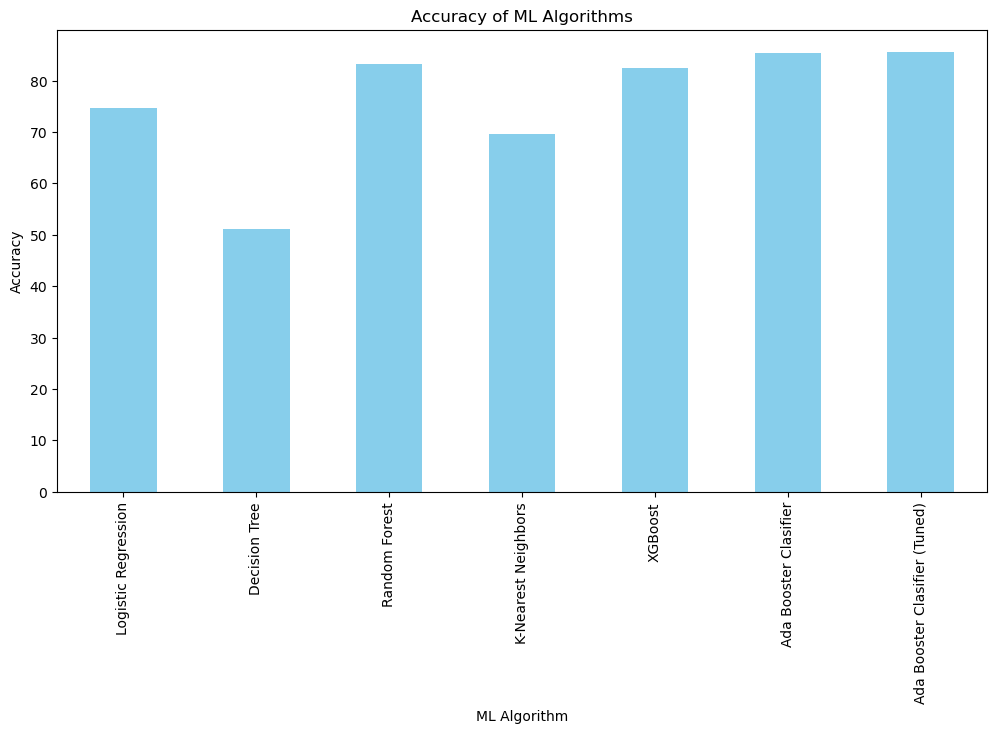

In [389]:
df_algo['Accuracy'] = pd.to_numeric(df_algo['Accuracy'].str.rstrip('%'))
df_algo.set_index('ML Algorithm')['Accuracy'].plot(kind='bar', figsize=(12, 6), color='skyblue')

plt.ylabel('Accuracy')
plt.title('Accuracy of ML Algorithms')
plt.show()

In [390]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[136  37]
 [ 17 185]]


In [391]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.83       173
           1       0.83      0.92      0.87       202

    accuracy                           0.86       375
   macro avg       0.86      0.85      0.85       375
weighted avg       0.86      0.86      0.85       375

